Importação das bibliotecas

In [ ]:
!pip install pandas

In [2]:
import sys
sys.path.append('../')

import pandas as pd
pd.set_option('display.float_format', lambda x: '%0f' % x)

from src.data_clearing.duplicate_data import count_duplicates

In [4]:
#dando um apelido para função 
import src.data_clearing.duplicate_data as dd

In [6]:
import src.data_viz.chats as ch

In [5]:
df = pd.read_csv('../datasets/raw/consumo_energia_eletrica.csv', sep=',')
df.head()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451
2,2004,1,PR,Total,NaN,1596274
3,2004,1,RS,Total,NaN,1780912
4,2004,1,GO,Total,NaN,630624


Análise inicial dos dados
***

In [6]:
df.duplicated().sum()#posso apenas contar os dados duplicados da df

np.int64(1017)

In [7]:
#Aqui estou chamando uma função que  esta declarada dentro do src> data cleraring> duplicate_data
count_duplicates(dataframe=df)

foram encontrdos 1017 ddos duplicados


In [8]:
#Aqui estou uma função que  esta declarada dentro do src> data cleraring> duplicate_data, porém com o apelido da função dd
dd.count_duplicates(dataframe=df)

foram encontrdos 1017 ddos duplicados


In [9]:
df.drop_duplicates(implaces=True)

TypeError: DataFrame.drop_duplicates() got an unexpected keyword argument 'implaces'

In [10]:
count_duplicates(df)

foram encontrdos 1017 ddos duplicados


In [11]:
df.describe().round(3)

,ano,mes,numero_consumidores,consumo
count,39897.000000,39897.000000,26937.000000,39897.000000
mean,2013.742000,6.506000,695456.724000,607686.150000
std,5.886000,3.454000,1869919.577000,1198424.663000
min,2004.000000,1.000000,52.000000,354.000000
25%,2009.000000,4.000000,18741.000000,85592.000000
50%,2014.000000,7.000000,108439.000000,219767.000000
75%,2019.000000,10.000000,458150.000000,594641.000000
max,2023.000000,12.000000,19201264.000000,12809742.000000


In [12]:
df.tail()

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
39892,2023,12,BA,Residencial,5932740.000000,718461
39893,2023,12,PA,Residencial,2614106.000000,478726
39894,2023,12,AC,Residencial,245699.000000,58301
39895,2023,12,RN,Residencial,1390080.000000,210119
39896,2023,12,SC,Residencial,2719791.000000,655389


In [13]:
df['tipo_consumo'].value_counts()


tipo_consumo
Industrial     6804
Comercial      6804
Residencial    6804
Outros         6525
Cativo         6480
Total          6480
Name: count, dtype: int64

In [14]:
filtro = (df['sigla_uf'] =='MG') & (df['ano'] ==2022) & (df['mes'] == 1)
df[filtro].head(30)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
35011,2022,1,MG,Total,NaN,4942127
35329,2022,1,MG,Cativo,NaN,2258147
35665,2022,1,MG,Outros,699160.000000,538796
35972,2022,1,MG,Comercial,992821.000000,666039
36304,2022,1,MG,Industrial,34762.000000,2673187
36617,2022,1,MG,Residencial,7825082.000000,1064104


In [15]:
filtro = (df['sigla_uf'] =='MG') & (df['ano'] == 2022) & (df['mes'] == 1)
dados = df[filtro].head(30)
dados

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
35011,2022,1,MG,Total,NaN,4942127
35329,2022,1,MG,Cativo,NaN,2258147
35665,2022,1,MG,Outros,699160.000000,538796
35972,2022,1,MG,Comercial,992821.000000,666039
36304,2022,1,MG,Industrial,34762.000000,2673187
36617,2022,1,MG,Residencial,7825082.000000,1064104


In [28]:
filtro = df['tipo_consumo'].isin(['Total' , 'Cativo'])
dados[filtro].groupby('sigla_uf')['consumo'].sum()

C:\Users\palvesco\AppData\Local\Temp\ipykernel_19836\3458912975.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dados[filtro].groupby('sigla_uf')['consumo'].sum()


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [29]:
nulos_por_ano = df.groupby(['ano', 'sigla_uf', 'tipo_consumo']) ['numero_consumidores'].apply(lambda x: x.isna().sum())
nulos_por_ano.tail(30)

ano   sigla_uf  tipo_consumo
2023  RN        Outros          0
                Residencial     0
      RO        Comercial       0
                Industrial      0
                Outros          0
                Residencial     0
      RR        Comercial       0
                Industrial      0
                Outros          0
                Residencial     0
      RS        Comercial       0
                Industrial      0
                Outros          0
                Residencial     0
      SC        Comercial       0
                Industrial      0
                Outros          0
                Residencial     0
      SE        Comercial       0
                Industrial      0
                Outros          0
                Residencial     0
      SP        Comercial       0
                Industrial      0
                Outros          0
                Residencial     0
      TO        Comercial       0
                Industrial      0
                Out

In [30]:
df = df.dropna()

In [31]:
df.isna().sum()

ano                    0
mes                    0
sigla_uf               0
tipo_consumo           0
numero_consumidores    0
consumo                0
dtype: int64

Residencial

In [43]:
filtro = df['tipo_consumo'] == 'Residencial'
df[filtro].groupby('sigla_uf')['consumo'].sum().reset_index().sort_values(by='consumo', ascending=False).head()



,sigla_uf,consumo
25,SP,771420784
18,RJ,259965035
10,MG,211991249
22,RS,163490022
17,PR,143960667


<Axes: xlabel='sigla_uf', ylabel='consumo'>

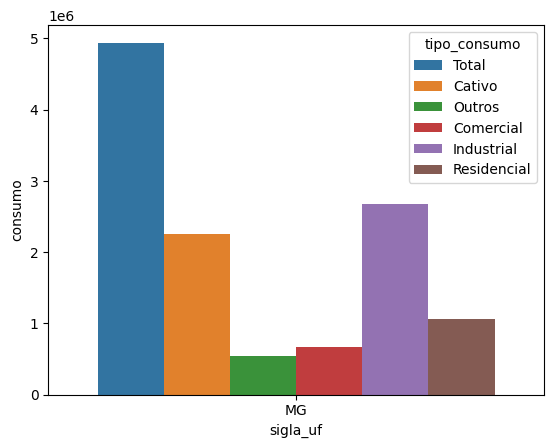

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=dados, x='sigla_uf', y='consumo',hue='tipo_consumo')

In [51]:
dados = df.groupby('sigla_uf')['consumo'].sum().reset_index().sort_values(by='consumo', ascending=False).head()
display(dados)

,sigla_uf,consumo
25,SP,2653887197
10,MG,1119341475
18,RJ,768732221
17,PR,596487107
22,RS,578813884


<Axes: xlabel='sigla_uf', ylabel='consumo'>

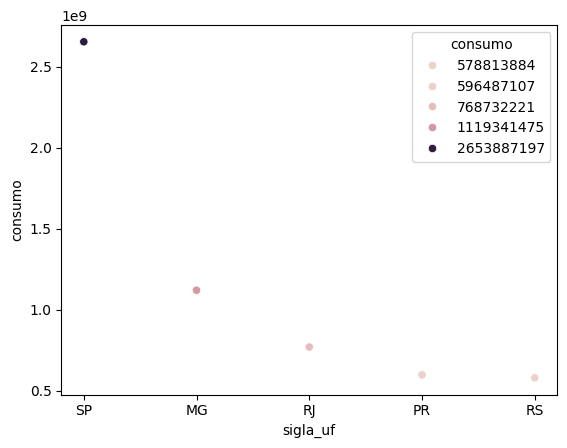

In [53]:
sns.scatterplot(data=dados, 
                x='sigla_uf',
                y='consumo',
                hue= 'consumo')